Create a list of models' mean error between seeds and sort them.

In [ ]:
import os
import regex as re
import pandas as pd
import json

# Define the directory path
directory = '/Volumes/NNFunction/nnbellman-OctoberOutput/saved/both/none_in_none_scaled'
counter = 0
#output_type = os.path.basename(directory)
output_type = "both"
pe=True
metrics=['Model MAE', 'Validation MAE', "Model Max AE", "Validation Max AE"]
if output_type=="both":
    metrics=metrics+["Model Wrong i_a", "Validation Wrong i_a","Model Consumption MAE", "Validation Consumption MAE", "Model Consumption Max AE", "Validation Consumption Max AE","Model i_a MAE", "Validation i_a MAE", "Model i_a Max AE", "Validation i_a Max AE"]
if pe==True:
    if output_type=="both" or output_type=="consumption":
        metrics=metrics+[ "Validation Consumption MPE",  "Validation Consumption Max PE"] 
    if output_type=="both" or output_type=="i_a":
        metrics=metrics+["Validation i_a MPE",  "Validation i_a Max PE"]
    # Initialize an empty dataframe
print(['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'] + metrics)

df = pd.DataFrame(columns=(['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'] + metrics))
for root, _,files in os.walk(directory):
    for filename in files:

        if filename.endswith('.log') and filename != '._info.log':

            filepath = os.path.join(root, filename)

            # Read the contents of the file
            with open(filepath, 'r') as file:
                content = file.read()  

            # Extract the seed, model type, max nodes, and learning rate from the corresponding config file

            configpath = filepath.replace('info.log', 'config.json')
            configpath = configpath.replace('log', 'models')
            print(configpath)
            with open(configpath, 'r') as f:
                config = json.load(f)
            seed = config["seed"]
            model_type = config["arch"]["type"]
            max_nodes = config["arch"]["args"]["max_nodes"]
            learning_rate = config["optimizer"]["args"]["lr"]
            batch_size = config["data_loader"]["args"]["batch_size"]

            print(seed, model_type, max_nodes,learning_rate, batch_size)   



            # Extract the metric value preceeding the last instance of saving the best model
            with open(filepath, 'r') as file:
                text = file.read()

            best_loc = text.rfind('Saving current best: model_best.pth ...')

            before_best = text[:best_loc]

            if output_type=="i_a":
                mcatarget = re.search(r'\s+category_accuracy\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                category_accuracy= float(mcatarget.group(1))
                nafptarget = re.search(r'\s+no_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                no_adapt_falsepositive= float(nafptarget.group(1))
                nafntarget = re.search(r'\s+no_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                no_adapt_falsenegative= float(nafntarget.group(1))
                lafptarget = re.search(r'\s+low_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                low_adapt_falsepositive= float(lafptarget.group(1))
                lafntarget = re.search(r'\s+low_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                low_adapt_falsenegative= float(lafntarget.group(1))
                hafptarget = re.search(r'\s+high_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                high_adapt_falsepositive= float(hafptarget.group(1))
                hafntarget = re.search(r'\s+high_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                high_adapt_falsenegative= float(hafntarget.group(1))
            else:
                mmaetarget = re.search(r'\s+model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                model_mse= float(mmsetarget.group(1))
                mmsetarget = re.search(r'\s+model_mse\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                model_mae= float(mmaetarget.group(1))
                mmxaetarget = re.search(r'\s+model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                model_max_ae= float(mmxaetarget.group(1))
                if output_type == "both":
                
                    mwiatarget = re.search(r'\s+n_wrong_i_a\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    model_wrong_i_a= float(mwiatarget.group(1))
                    cmaetarget = re.search(r'\s+consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    consumption_mae= float(cmaetarget.group(1))
                    cmaxaetarget = re.search(r'\s+consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    consumption_max_ae= float(cmaxaetarget.group(1))
                    iamaetarget = re.search(r'\s+i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    i_a_mae= float(iamaetarget.group(1))
                    iamxaetarget = re.search(r'\s+i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    i_a_max_ae= float(iamxaetarget.group(1))
            

            #Validation Metrics
            if output_type=="i_a":
                vcatarget = re.search(r'\s+val_category_accuracy\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_category_accuracy= float(vcatarget.group(1))
                vnafptarget = re.search(r'\s+val_no_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_no_adapt_falsepositive= float(vnafptarget.group(1))
                vnafntarget = re.search(r'\s+val_no_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_no_adapt_falsenegative= float(vnafntarget.group(1))
                vlafptarget = re.search(r'\s+val_low_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_low_adapt_falsepositive= float(vlafptarget.group(1))
                vlafntarget = re.search(r'\s+val_low_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_low_adapt_falsenegative= float(vlafntarget.group(1))
                vhafptarget = re.search(r'\s+val_high_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_high_adapt_falsepositive= float(vhafptarget.group(1))
                vhafntarget = re.search(r'\s+val_high_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            vmaetarget = re.search(r'\s+val_model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_mae= float(vmaetarget.group(1))        
            vmxaetarget = re.search(r'\s+val_model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_max_ae= float(vmxaetarget.group(1))
            if output_type=="both":
                vwiatarget = re.search(r'\s+val_n_wrong_i_a\s*:\s+(\d+)', before_best, re.REVERSE)
                val_wrong_i_a= float(vwiatarget.group(1))
                viamaetarget = re.search(r'\s+val_i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_i_a_mae= float(viamaetarget.group(1))
                viamxaetarget = re.search(r'\s+val_i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_i_a_max_ae= float(viamxaetarget.group(1))
            if output_type=="both" or output_type=="consumption":
                vcmaetarget = re.search(r'\s+val_consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_consumption_mae= float(vcmaetarget.group(1))
                vcmaxaetarget = re.search(r'\s+val_consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_consumption_max_ae= float(vcmaxaetarget.group(1))

            if pe==True:
                if output_type=="both" or output_type=="consumption":
                    vcmpetarget = re.search(r'\s+val_consumption_mpe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_consumption_mpe= float(vcmpetarget.group(1))
                    vcmaxpetarget = re.search(r'\s+val_consumption_max_pe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_consumption_max_pe= float(vcmaxpetarget.group(1))
                if output_type=="both":
                    viampetarget = re.search(r'\s+val_i_a_mpe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_i_a_mpe= float(viampetarget.group(1))
                    viamaxpetarget = re.search(r'\s+val_i_a_max_pe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_i_a_max_pe= float(viamaxpetarget.group(1))
            #print(f"model_mae: {model_mae},\n val_mae: {val_mae},\n model_max_ae: {model_max_ae},\n val_max_ae: {val_max_ae},\n model_wrong_i_a: {model_wrong_i_a},\n val_wrong_i_a: {val_wrong_i_a},\n consumption_mae: {consumption_mae},\n val_consumption_mae: {val_consumption_mae},\n consumption_max_ae: {consumption_max_ae},\n val_consumption_max_ae: {val_consumption_max_ae},\n i_a_mae: {i_a_mae},\n val_i_a_mae: {val_i_a_mae},\n i_a_max_ae: {i_a_max_ae},\n val_i_a_max_ae: {val_i_a_max_ae}")

            metrics_dict={'Model MAE': model_mae, 'Validation MAE':val_mae, 
                          "Model Max AE": model_max_ae, "Validation Max AE":val_max_ae}
            if output_type=="both":
                metrics_dict={**metrics_dict,**{"Model Wrong i_a": model_wrong_i_a, "Validation Wrong i_a":val_wrong_i_a, 
                                                "Model Consumption MAE": consumption_mae, "Validation Consumption MAE":val_consumption_mae,
                                                "Model Consumption Max AE": consumption_max_ae, "Validation Consumption Max AE":val_consumption_max_ae, 
                                                "Model i_a MAE": i_a_mae, "Validation i_a MAE":val_i_a_mae,  
                                                "Model i_a Max AE": i_a_max_ae, "Validation i_a Max AE":val_i_a_max_ae}}
            if pe==True:
                metrics_dict={**metrics_dict,**{ "Validation Consumption MPE":val_consumption_mpe,
                                                "Validation Consumption Max PE":val_consumption_max_pe, 
                                                "Validation i_a MPE":val_i_a_mpe,  
                                                "Validation i_a Max PE":val_i_a_max_pe}}
            entry={'Seed': seed, 'Model Type': model_type, 'Max Nodes': max_nodes, "Learning Rate": learning_rate, "Batch Size": batch_size,**metrics_dict}

            # Append the data to the dataframe
            df.loc[len(df)]=entry

# Print and save the resulting dataframe
print(df)
df.to_csv('nnperformance-none_in_none.csv', index=False)


/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_987/606703443.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size', 'Model MAE', 'Validation MAE', 'Model Max AE', 'Validation Max AE', 'Model Wrong i_a', 'Validation Wrong i_a', 'Model Consumption MAE', 'Validation Consumption MAE', 'Model Consumption Max AE', 'Validation Consumption Max AE', 'Model i_a MAE', 'Validation i_a MAE', 'Model i_a Max AE', 'Validation i_a Max AE']
/Volumes/NNFunction/nnbellman-OctoberOutput/saved/both/none_in_none_scaled/S84/models/both_FourLayer_1024/1025_150917/config.json
84 FourLayer 1024 0.0001 128
/Volumes/NNFunction/nnbellman-OctoberOutput/saved/both/none_in_none_scaled/S84/models/both_FourLayer_1024/1025_144031/config.json
84 FourLayer 1024 0.001 512
/Volumes/NNFunction/nnbellman-OctoberOutput/saved/both/none_in_none_scaled/S84/models/both_FourLayer_1024/1025_145225/config.json
84 FourLayer 1024 0.01 128
/Volumes/NNFunction/nnbellman-OctoberOutput/saved/both/none_in_none_scaled/S84/models/both_FourLayer_1024/1025_145614/config.json
84 FourLayer 1024 

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/NNFunction/nnbellman-OctoberOutput/saved/both/none_in_none_scaled/S84/log/both_PudgeSixLayer_512/1025_180204/info.log'

In [23]:
df=pd.read_csv('nnperformance-all_in_both.csv')
means=df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[df.columns[5:19]].mean()
print(df.head())

print(f'Lowest Model MAE: {means["Model MAE"].idxmin()}')
print(f'Lowest Validation MAE: {means["Validation MAE"].idxmin()}\n{means.loc[means["Validation MAE"].idxmin()]}')
print(f'Lowest Model Max AE: {means["Model Max AE"].idxmin()}')
print(f'Lowest Validation Max AE: {means["Validation Max AE"].idxmin()}')
if output_type=="both":
    print(f'Lowest Model Wrong i_a: {means["Model Wrong i_a"].idxmin()}')
    print(f'Lowest Validation Wrong i_a: {means["Validation Wrong i_a"].idxmin()}\n{means.loc[means["Validation Wrong i_a"].idxmin()]}')
    print(f'Lowest Model Consumption MAE: {means.loc[means["Model Consumption MAE"].idxmin()].name}')
    print(f'Lowest Validation Consumption MAE: {means.loc[means["Validation Consumption MAE"].idxmin()].name}')
    print(f'Lowest Model Consumption Max AE: {means.loc[means["Model Consumption Max AE"].idxmin()].name}')
    print(f'Lowest Validation Consumption Max AE: {means.loc[means["Validation Consumption Max AE"].idxmin()].name}')
    print(f'Lowest Model i_a MAE: {means.loc[means["Model i_a MAE"].idxmin()].name}')
    print(f'Lowest Validation i_a MAE: {means.loc[means["Validation i_a MAE"].idxmin()].name}')
    print(f'Lowest Model i_a Max AE: {means.loc[means["Model i_a Max AE"].idxmin()].name}')
    print(f'Lowest Validation i_a Max AE: {means.loc[means["Validation i_a Max AE"].idxmin()].name}')

   Seed Model Type  Max Nodes  Learning Rate  Batch Size  Model MAE  \
0    84  FourLayer       1024         0.0010         512   0.170685   
1    84  FourLayer       1024         0.0001         128   0.170536   
2    84  FourLayer       1024         0.0100         128   0.170726   
3    84  FourLayer       1024         0.0010          64   0.171211   
4    84  FourLayer       1024         0.0010         128   0.171533   

   Validation MAE  Model Max AE  Validation Max AE  Model Wrong i_a  \
0        0.169216      0.881348           0.903135           8496.0   
1        0.169464      0.858883           0.879845           8085.0   
2        0.169563      0.845305           0.848109           7307.0   
3        0.168786      0.855440           0.856043           9551.0   
4        0.167834      0.866465           0.871829          10933.0   

   Validation Wrong i_a  Model Consumption MAE  Validation Consumption MAE  \
0                1583.0               2.064256                    2.

/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_3871/2515019333.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(max_nodes))


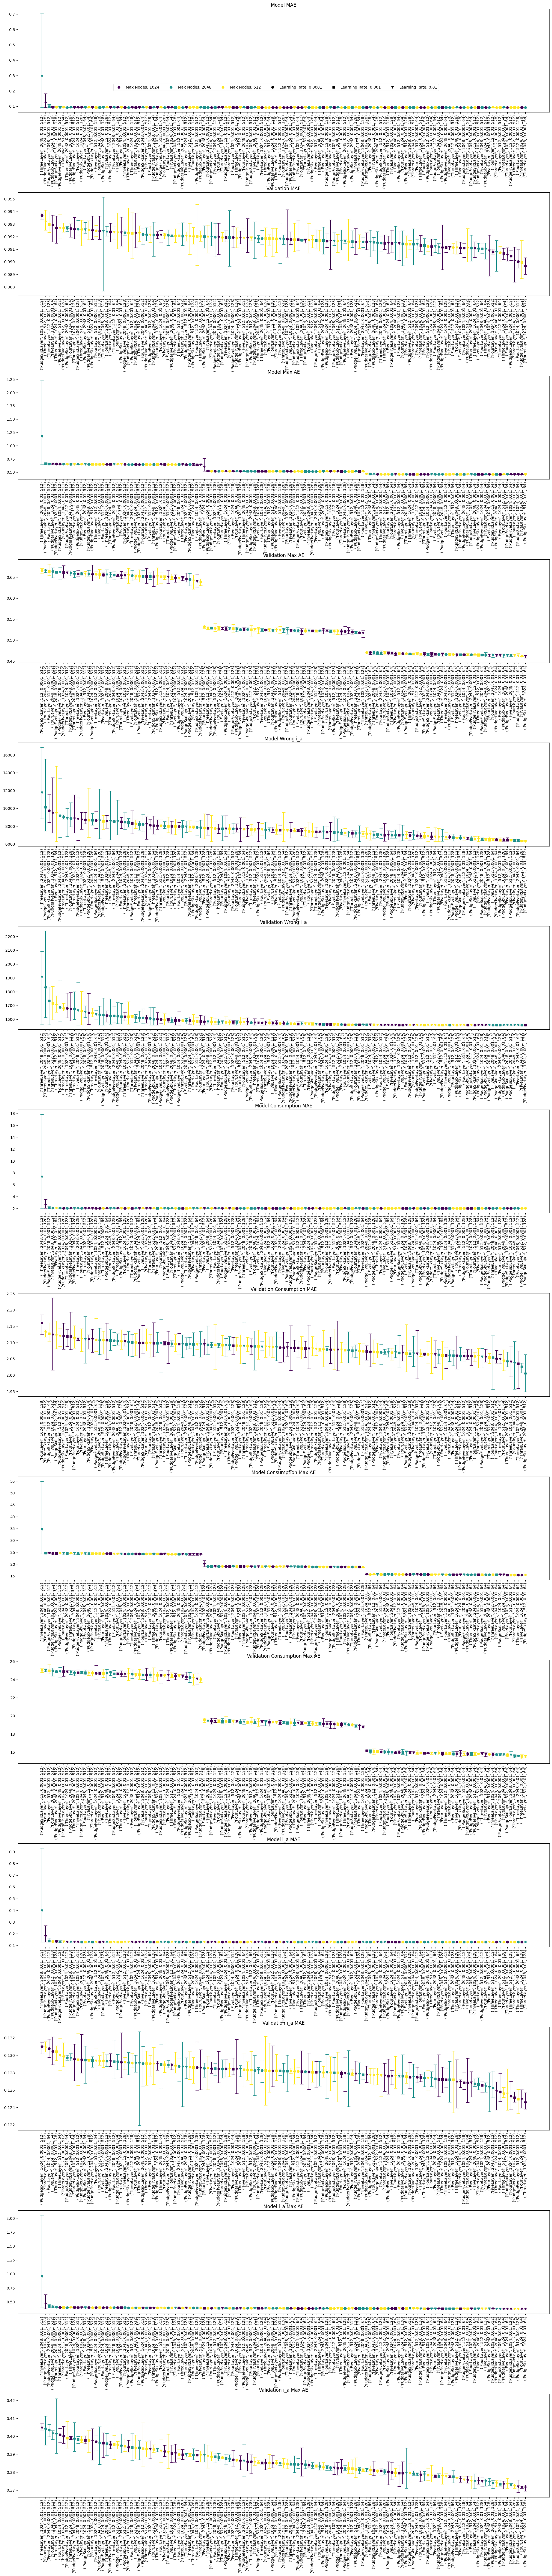

     Seed     Model Type  Max Nodes  Learning Rate  Batch Size  Model MAE  \
119    21  PudgeSixLayer       1024          0.001          64   0.091739   
260    42  PudgeSixLayer       1024          0.001          64   0.091728   
391    84  PudgeSixLayer       1024          0.001          64   0.091706   

     Validation MAE  Model Max AE  Validation Max AE  Model Wrong i_a  \
119        0.091121      0.460766           0.471547           6627.0   
260        0.093273      0.461081           0.464511           7331.0   
391        0.090886      0.461387           0.472265           6534.0   

     Validation Wrong i_a  Model Consumption MAE  Validation Consumption MAE  \
119                1560.0               2.051211                    2.072351   
260                1560.0               2.053101                    2.107881   
391                1560.0               2.050776                    2.071615   

     Model Consumption Max AE  Validation Consumption Max AE  Model i_a MAE  

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines


# Create a figure with 14 subplots arranged in a 14x1 grid
fig, axs = plt.subplots(len(metrics), 1, figsize=(20, 100))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define a color map for the max nodes
max_nodes = df['Max Nodes'].unique()
colors = plt.cm.get_cmap('viridis', len(max_nodes))
color_map = {node: colors(i) for i, node in enumerate(max_nodes)}

# Define a marker map for the learning rates
learning_rates = df['Learning Rate'].unique()
markers = ['o', 's', 'v', '^', '<', '>', '8', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
marker_map = {rate: markers[i % len(markers)] for i, rate in enumerate(learning_rates)}

# Create custom legend handles and labels
handles = [mlines.Line2D([], [], color=color_map[node], marker='o', linestyle='None') for node in max_nodes] + [mlines.Line2D([], [], color='black', marker=marker_map[rate], linestyle='None') for rate in learning_rates]
labels = [f'Max Nodes: {node}' for node in max_nodes] + [f'Learning Rate: {rate}' for rate in learning_rates]

# For each metric, create a scatter plot with error bars
for i, metric in enumerate(metrics):
    # Calculate the mean, min, and max for each group
    group_stats = df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[metric].agg(['mean', 'min', 'max'])
    
    # Sort the groups in descending order based on mean value
    group_stats = group_stats.sort_values(by='mean', ascending=False)
    
    # Create the scatter plot with colors corresponding to the max nodes and markers corresponding to the learning rate
    x = np.arange(len(group_stats))
    for j, (group, stats) in enumerate(group_stats.iterrows()):
        model_type, max_node, learning_rate, _ = group
        axs[i].errorbar(j, stats['mean'], yerr=[[stats['mean']-stats['min']], [stats['max']-stats['mean']]], fmt=marker_map[learning_rate], capsize=4, color=color_map[max_node])
    
    # Set the title of the subplot
    axs[i].set_title(metric)
    
    # Set the x-ticks to be the group names
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(group_stats.index, rotation=90)

# Add the legend to the figure
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Leave more space for the x-axis names
plt.subplots_adjust(bottom=0.1)

# Show the plot
plt.show()

print(df[(df['Model Type'] == 'PudgeSixLayer') & (df['Max Nodes'] == 1024) & (df['Learning Rate'] == 0.001) & (df['Batch Size'] == 64)])